<h1 align='center'>K-Means clustering (Phân cụm K-Means)</h1>

# 1. Giới thiệu về K-Means clustering
Phân cụm là kỹ thuật rất quan trọng trong khai phá dữ liệu, nó thuộc lớp các phương pháp Unsupervised Learning trong Machine Learning. Nó được định nghĩa là các qui trình tìm cách nhóm các đối tượng đã cho vào các cụm (clusters), sao cho các đối tượng trong cùng 1 cụm tương tự (similar) nhau và các đối tượng khác cụm thì không tương tự (Dissimilar) nhau.

Mục đích của phân cụm là tìm ra bản chất bên trong các nhóm của dữ liệu. Các thuật toán phân cụm (Clustering Algorithms) đều sinh ra các cụm (clusters). Tuy nhiên, không có tiêu chí nào là được xem là tốt nhất để đánh hiệu của của phân tích phân cụm, điều này phụ thuộc vào mục đích của phân cụm như: data reduction, “natural clusters”, “useful” clusters, outlier detection

Kỹ thuật phân cụm có thể áp dụng trong rất nhiều lĩnh vực như:
* Thông tin nhân khẩu học: đánh giá giới tính, tuổi tác, tình trạng hôn nhân, nghề nghiệp:
* Thông tin về mặt địa lý: đánh giá thông tin tại các địa phương, phục vụ cho các doanh nghiệp mở của hoạt động trao đổi tại địa điểm đó.
* Tâm lý học: đánh giá tầng lớp xã hội, thói quen chi tiêu, mức độ tiêu thụ sản phẩm/dịch vụ, mong muốn và lợi ích.

In [2]:
import pandas as pd

import numpy as np
from numpy import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

import seaborn as sns
plt.style.use('fivethirtyeight')

## 1.1. Nạp và đánh giá sơ bộ dữ liệu đầu vào

### 1.1.1 Về bộ dữ liệu được cung cấp:
Mua sắm cá nhân còn gọi là đi chợ (siêu thị,...) hay mua đồ là các hoạt động lựa chọn và mua hàng hóa trực tiếp tại các điểm bán lẻ, đây không chỉ là một hoạt động mua bán đơn thuần mà còn là hoạt động giải trí. Mua sắm thường được thực hiện ở các địa điểm cố định (tại các cửa hàng, các cửa hàng bách hóa, tiệm tạp hóa hoặc chợ, siêu thị...), các mặt hàng mua sắm thường là những mặt hàng gia dụng, thẩm mỹ,...vv

Bộ dữ liệu dưới đây là thông tin mua sắm của 200 khách hàng tại một siêu thị được cung cấp thông qua thẻ khách hàng thân thiết. Bộ dữ liệu này cung cấp cho ta 5 trường dữ liệu sau: 
1. ID khách hàng: **Customer ID**
2. Giới tính (0 = nữ, 1 = nam): **Gender**
3. Tuổi: **Age**
4. Thu nhập hàng năm: **Annual Income (k$)**
5. Điểm chi tiêu: **Spending Score (1-100)**

In [3]:
# load dataset
dataset = pd.read_csv('../ds/kmeans-customer/Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 1.1.2 Đánh giá sơ bộ về dataset được cung cấp:

1. Bộ dữ liệu cung cấp đươc chiếm đa số bởi nữ giới: (nam giới chỉ chiểm 44%)
2. Độ tuổi trung bình rơi vào 39 tuổi trong đó
3. Số chi tiêu trung bình rơi vào 50k$
4. Thu nhập trung bình là 60k$ một năm

Thông qua các chỉ số trung bình trên ta nhận thấy những người hay đi mua sắm tại đây là những người sắp trung niên và đa số họ là phụ nữ.

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Bản đồ nhiệt sau đây cung cấp một cái nhìn tổng quan về mối tương quan giữa các trường dữ liệu với nhau. </br>
***Màu xanh càng đậm thì dữ liệu càng không tương quan tới nhau.***


Ở đây ta nhận thấy **chỉ số thu nhập hàng năm** (Annual Income) với **Điểm chi tiêu** (Spending Score) có độ tương quan lớn trên biểu đồ nhiệt được sinh ra. Vậy nên chúng ta sẽ lựa chọn hai trường **Annual Income (k$)** và trường **Spending Score (1-100)** để phân cụm nhóm dữ liệu. Đối với những dữ liệu còn lại sau khi phân cụm xong ta sẽ đánh giá chúng song song cùng với các phân cụm để có thể biết thêm về thông tin những phân cụm này.

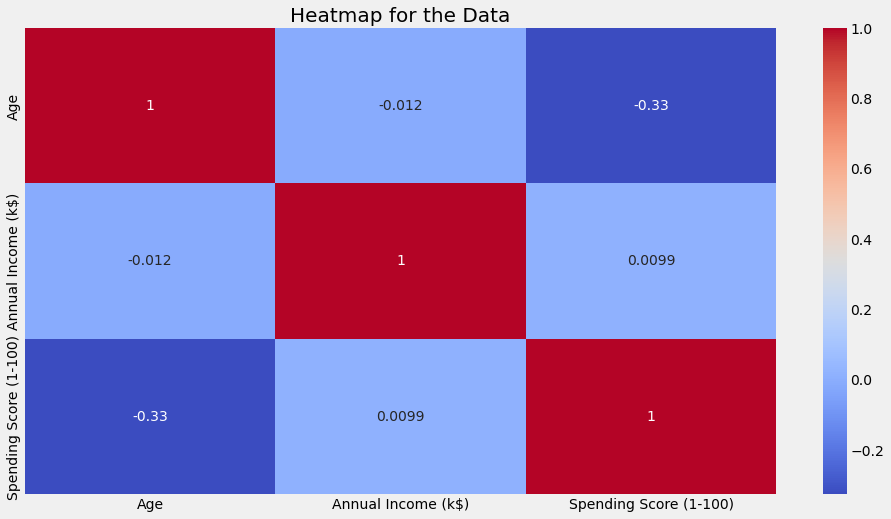

In [5]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), cmap = 'coolwarm', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### 1.1.3 Phân tích hai biến số giữa **Giới tính** và **Điểm chi tiêu**

**Phân bổ giới tính vơi điểm chi tiêu**

D:\Program File\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


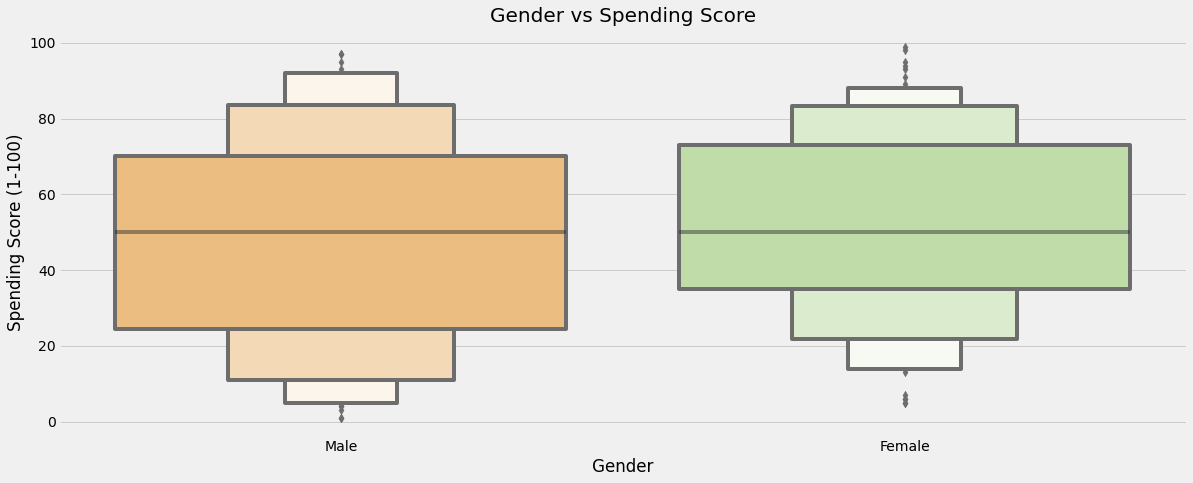

In [6]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(dataset['Gender'], dataset['Spending Score (1-100)'], palette = 'Spectral')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

<p align='center'>Trong khi nam giới chỉ có chỉ số chi tiêu từ 25k$-70k$ thì phụ nữ có chỉ số chi tiêu tới tận 35k$-75k$. Điều này cho thấy mua sắm là niềm đam mê dành cho phái nữ.</p>

D:\Program File\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


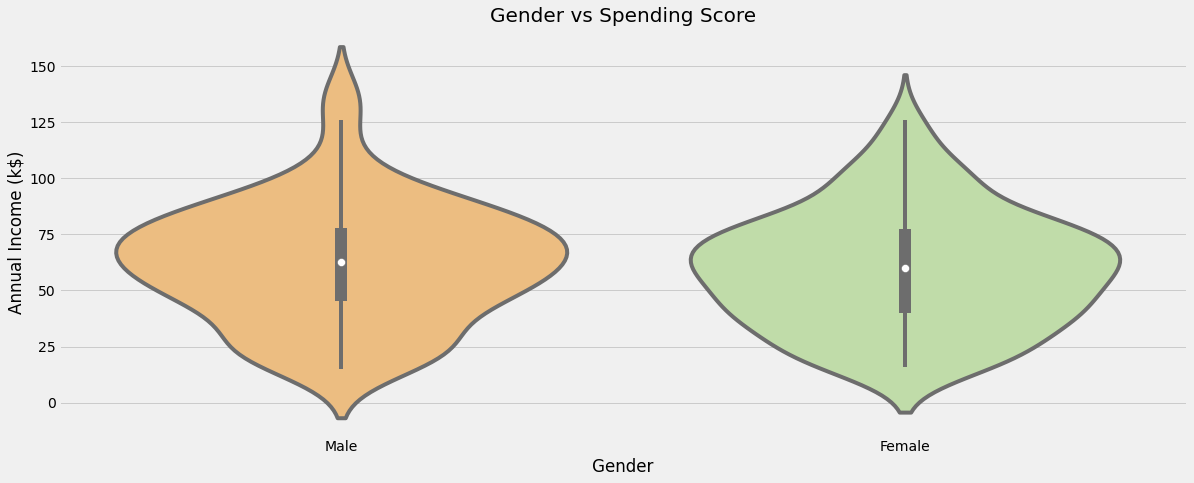

In [7]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(dataset['Gender'], dataset['Annual Income (k$)'], palette = 'Spectral')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

<p align='center'>Ở phần thu nhập trung bình và thấp, Nam giới và Nữ bằng nhau ở khoảng này. Nhưng riêng ở phần thu nhập cao thì Nam giới không những vừa có mức lương tối đa cao hơn nữ giới mà còn có mật độ cao hơn.</p>

## 1.2 Về phương thức hoạt động của thuật toán K-Means:
1. Chọn ngẫu nhiên K tâm (centroid) cho K cụm (cluster). Mỗi cụm được đại diện bằng các tâm của cụm.
2. Tính khoảng cách giữa các đối tượng (objects) đến K tâm (thường dùng khoảng cách Euclidean)
3. Nhóm các đối tượng vào nhóm gần nhất
4. Xác định lại tâm mới cho các nhóm
5. Thực hiện lại bước 2 cho đến khi không có sự thay đổi nhóm nào của các đối tượng

Mô tả lại bưới 2-5 thông qua công thức: </br>
Lặp lại cho tới khi hội tụ: { </br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Với mỗi i: </br>

$$ c^i\text{:=}\arg  \underset{j}{\min }\|x^i-\mu _j\|^2 $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Với mỗi j: </br>

$$ \mu _j\text{:=}\frac{\sum _{i=1}^m x^i \left\{c^i=j\right\}}{\sum _{i=1}^m 1 \left\{c^i=j\right\}} $$
}



In [8]:
class KMeans ():
    def __init__(self, X, clusters, seed, iterations=300):
        random.seed(seed)

        self.K = clusters
        self.X = X
        self.iterations = iterations
        self.features = X.shape[1]
        self.data_size = X.shape[0]

    def initRandomCentroids(self, X):
        centroids = np.zeros((self.K, self.features))
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.data_size))]
            centroids[k] = centroid
        return centroids

    def intClusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters

    def calculateNewCentroids(self, clusters, X):
        centroids = np.zeros((self.K, self.features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predictCluster(self, clusters, X):
        y_pred = np.zeros(self.data_size)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def labledData(self, X, y_pred):
        labeled_data = {}
        X_list = X.tolist()
        for i in range(y_pred.size):
            if y_pred[i] not in labeled_data:
                labeled_data[y_pred[i]] = [X_list[i]]
            else:
                labeled_data[y_pred[i]].append(X_list[i])

        for key in labeled_data:
            np_labled_data = labeled_data[key]
        return labeled_data

    # fit
    def fit(self):
        centroids = self.initRandomCentroids(self.X)

        for it in range(self.iterations):
            clusters = self.intClusters (self.X, centroids)

            previous_centroids = centroids
            centroids = self.calculateNewCentroids(clusters, self.X)

            diff = centroids - previous_centroids

            if not diff.any():
                break

        # Get label predictions
        y_pred = self.predictCluster(clusters, self.X)

        # Get labeled data
        labeled_data = self.labledData(self.X, y_pred)

        wcss=0
        for k in range(self.K):
            wcss+=np.sum((np.array(labeled_data[k])-centroids[k])**2)

        return y_pred, centroids, wcss

# 2. Đánh giá số lượng features để phân cụm bằng Within Cluster Sum Square (WCSS):

## 2.1 Về phương thức Chọn Elbow và WCSS
WCSS là phương pháp đánh giá khoảng cách trung bình của cụm tới trung tâm cụm đó. Để tính ra WCSS trước tiên ta cần tính ra khoảng cách Euclidean giữa từng điểm trong phân cụm tới tâm phân cụm đó. Sau khi tính được khoảng cách tất cả điểm trong phân cụm tới tâm phân cụm đó.

$$ \text{WCSS}=\sum _{i\in n} \left(X_i-y_i\right){}^2 $$

Với:
* $Y_i$: là tâm của  $X_i$
* $X_i$: là các điểm trên tập dữ liệu.

Mục đích chính của việt tính WCSS là để **Tối đa hoá số lượng phân cụm** và **Giói hạn số điểm phân cụm tự phát từ dữ liệu**

## 2.2 Lựa chọn điểm K tối ưu
Within-Cluster Sum of Square (WCSS)

In [9]:
# Choose your seed
seed=69

In [10]:
def plotEbow(X, K, seed):
    wcss_array = []
    for k in range(1, K):
        y, centroids, wcss = KMeans(X, k, seed).fit()
        wcss_array = np.append(wcss_array, wcss)

    plt.plot(np.arange(1, K), wcss_array, "-o")
    plt.plot(np.arange(1, K), wcss_array, 'D', markersize=8)

    plt.xlabel('Number of Clusters')
    plt.ylabel('within-cluster sums of squares (WCSS)')
    plt.title('Elbow method to determine optimum number of clusters')
    plt.show()

**Thông qua đánh giá ta thấy điểm K=5 chính là điểm Elbow tối ưu mà ta sẽ lựa chọn để phân cụm bộ dữ liệu.**

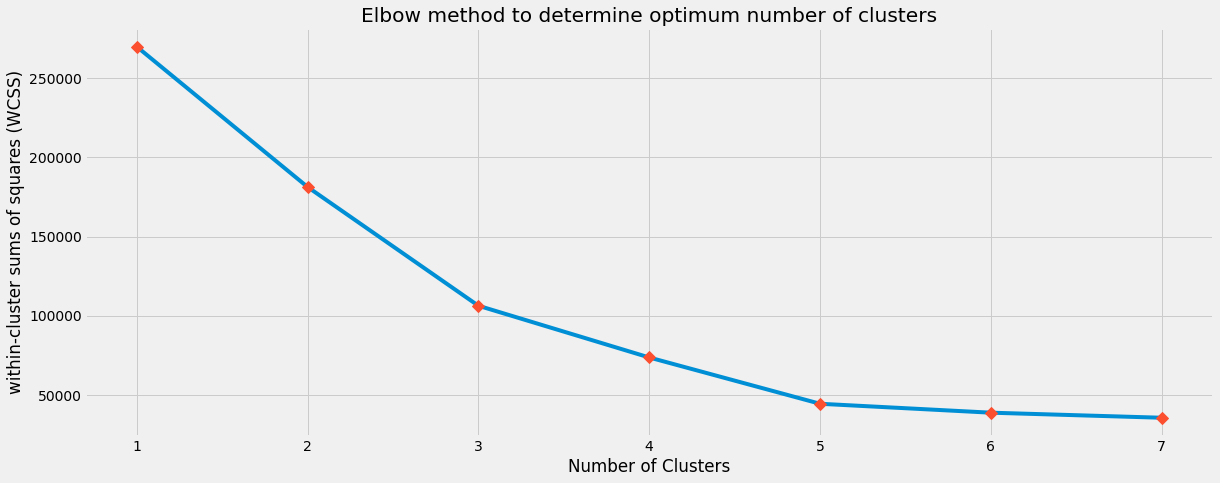

In [11]:
X = dataset.iloc[:, [3, 4]].values
plotEbow(X, 8, seed)

# 3. Cluster bộ dữ liệu bằng số điểm K tối ưu

In [12]:
# Cluster and add label to dataset
model =  KMeans(X, 5, seed)
Y, centroids, wcss = model.fit()
Y = Y.astype(int)

dataset['Label'] = Y.tolist()
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


# 4. Sơ đồ hoá kết quả phân cụm mà thông tin tập dữ liệu và đánh giá

## 4.1 Sơ đồ hoá kết quả phân cụm K-Means và đánh giá các phân cụm

In [1]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'pink', label = 'Nghèo không chi tiêu')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'yellow', label = 'Trung lập')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'cyan', label = 'Nghèo nhưng thích chi tiêu')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 100, c = 'magenta', label = 'Giàu tiêu nhiều')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 100, c = 'orange', label = 'Giàu nhưng kiệt')
plt.scatter(centroids[:,0], centroids[:, 1], s = 100, c = 'black' , label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
plt.show()

NameError: name 'plt' is not defined

Đánh giá phân cụm trên cho ta thấy rõ các nhóm đối tượng khác nhau thông qua số liệu được cung cấp. Có 5 nhóm đối tượng khách hàng là:
1. **General**: Nhóm khách hàng chung
2. **Miser**: Nhiều tiền nhưng chi ít (nhóm đối tượng kẹt xỉ)
3. **Spendthrift**: Nghèo nhưng chi nhiều (nhóm đối tượng chi tiêu hoang phí)
4. **Economy**: Nghèo nhưng chi vừa phải (nhóm đối tượng tiết kiệm)
5. **Target**: Nhóm khách hàng nhiều tiền chịu chi (nhóm đối tượng khách hàng cần nhắm tới)

In [14]:
def plotGroupsStatistics(dataframe, x_name, y_name):
    ax = dataframe.plot.barh(x=x_name, y=y_name)
    ax.bar_label(ax.containers[0])

Cập nhật tên nhãn mới cho bộ dữ liệu

In [15]:
dataset['Label'].replace({0: "Economy", 1: "General", 2: "Spendthrift", 3: "Target", 4: "Miser"}, inplace=True)
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,Economy
1,2,Male,21,15,81,Spendthrift
2,3,Female,20,16,6,Economy
3,4,Female,23,16,77,Spendthrift
4,5,Female,31,17,40,Economy
...,...,...,...,...,...,...
195,196,Female,35,120,79,Target
196,197,Female,45,126,28,Miser
197,198,Male,32,126,74,Target
198,199,Male,32,137,18,Miser


## 4.2 Đánh giá bổ sung cho các trường dữ liệu

In [16]:
label_df = dataset[['Label']]
label_df_count = label_df.value_counts().reset_index(name='Count')
label_df_count

,Label,Count
0,General,81
1,Target,39
2,Miser,35
3,Economy,23
4,Spendthrift,22


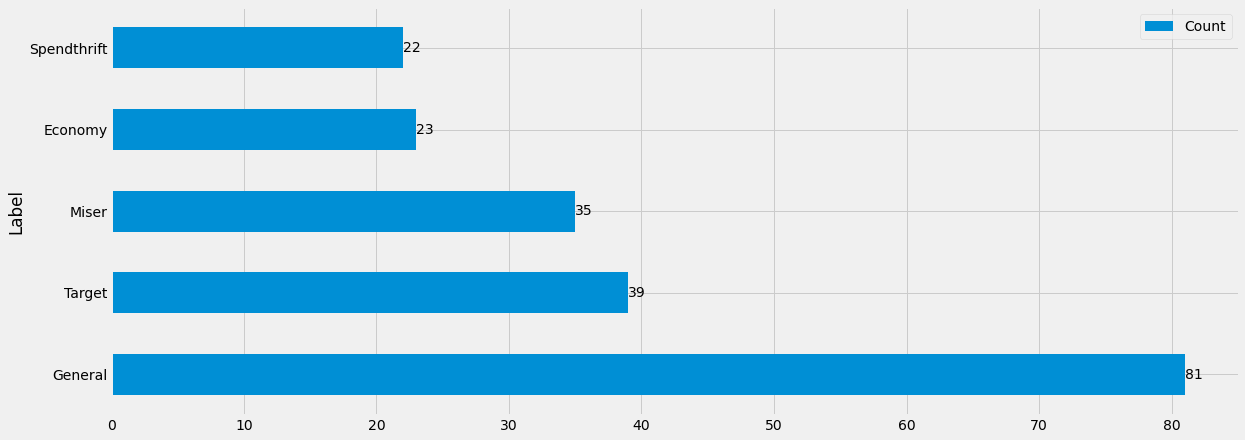

In [17]:
plotGroupsStatistics(label_df_count, 'Label', 'Count')

In [18]:
gender_statistics = dataset.groupby(['Gender', 'Label'])['Gender'].size().reset_index(name='Count')
gender_statistics

,Gender,Label,Count
0,Female,Economy,14
1,Female,General,48
2,Female,Miser,16
3,Female,Spendthrift,13
4,Female,Target,21
5,Male,Economy,9
6,Male,General,33
7,Male,Miser,19
8,Male,Spendthrift,9
9,Male,Target,18


### 4.2.1 Đánh giá về giới tính:

Text(0.5, 1.0, 'Gender statistics')

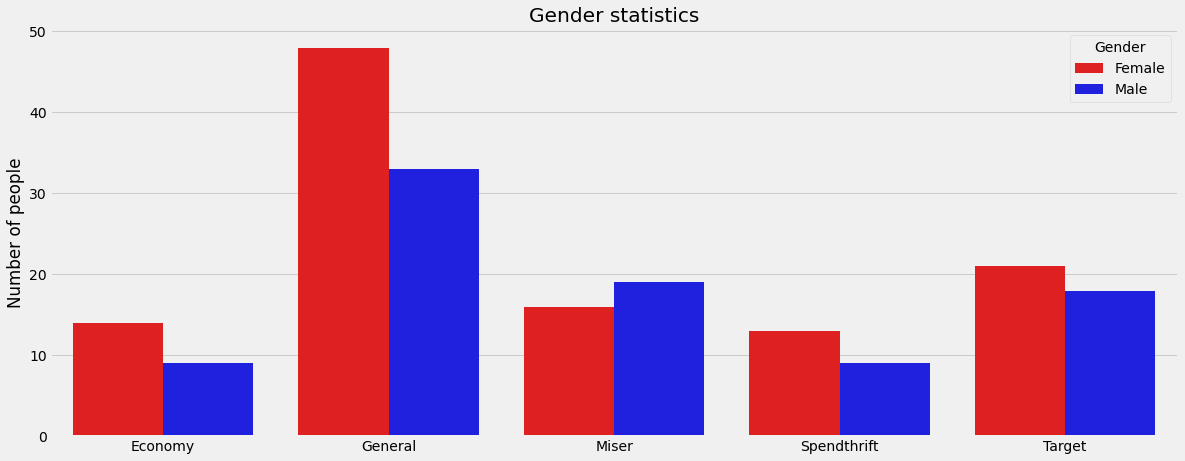

In [19]:
sns.barplot(x="Label", y="Count", hue='Gender', palette={'Female': 'Red', 'Male': 'Blue'}, data=gender_statistics)
plt.xlabel("", size=14)
plt.ylabel('Number of people')
plt.title('Gender statistics')

<p align='center'>Với mọi nhóm chung ta đều thấy, phụ nữ đều có chi tiêu mạnh tay hơn đàn ông. Điều này còn thể hiện đặc biệt riêng ở nhóm người **nhiều tiền nhưng tiết kiệm** (Miser), ta thấy đàn ông có xu hướng chi tiêu tiết kiệm hơn phụ nữ</p>

### 4.2.2 Đánh giá chỉ số tuổi tại mỗi nhóm:

In [20]:
age_df = dataset[['Age','Label']]
age_df_mean = age_df.groupby('Label').mean().reset_index()
age_df_mean

,Label,Age
0,Economy,45.217391
1,General,42.716049
2,Miser,41.114286
3,Spendthrift,25.272727
4,Target,32.692308


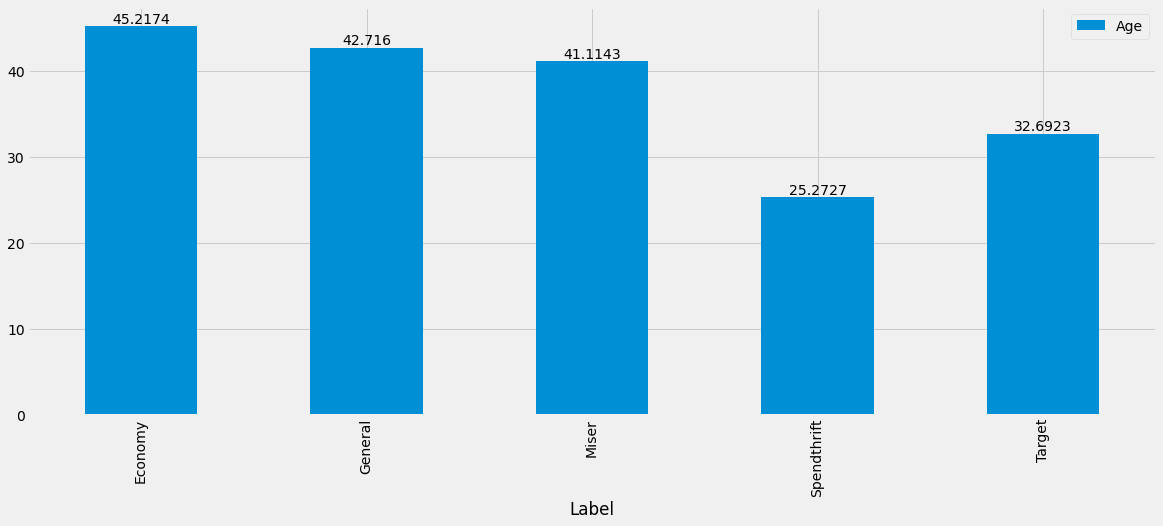

In [21]:
def plotMeanValue(dataframe, x_name, y_name):
    ax = dataframe.plot.bar(x=x_name, y=y_name)
    ax.bar_label(ax.containers[0])
plotMeanValue(age_df_mean, 'Label', 'Age')

Đánh giá về độ tuổi ta thấy:
* Nhóm tuổi trung bình trong khoảng từ 40+ (Trung niên): thường có xu hướng tiết kiệm trong chi tiêu.
* Nhóm tuổi trung bình trong khoảng từ 25-32 (Thanh niên): Thường có xu hướng chi tiêu phóng khoáng.

> Điều này cho ta thấy người trẻ thường có xu hướng chi tiêu không được tiết kiệm cho lắm.

# 5. Tổng kết đánh giá

In [22]:
income_df = dataset[['Annual Income (k$)','Label']]
income_df_mean = income_df.groupby('Label').mean().reset_index()
income_df_mean

,Label,Annual Income (k$)
0,Economy,26.304348
1,General,55.296296
2,Miser,88.200000
3,Spendthrift,25.727273
4,Target,86.538462


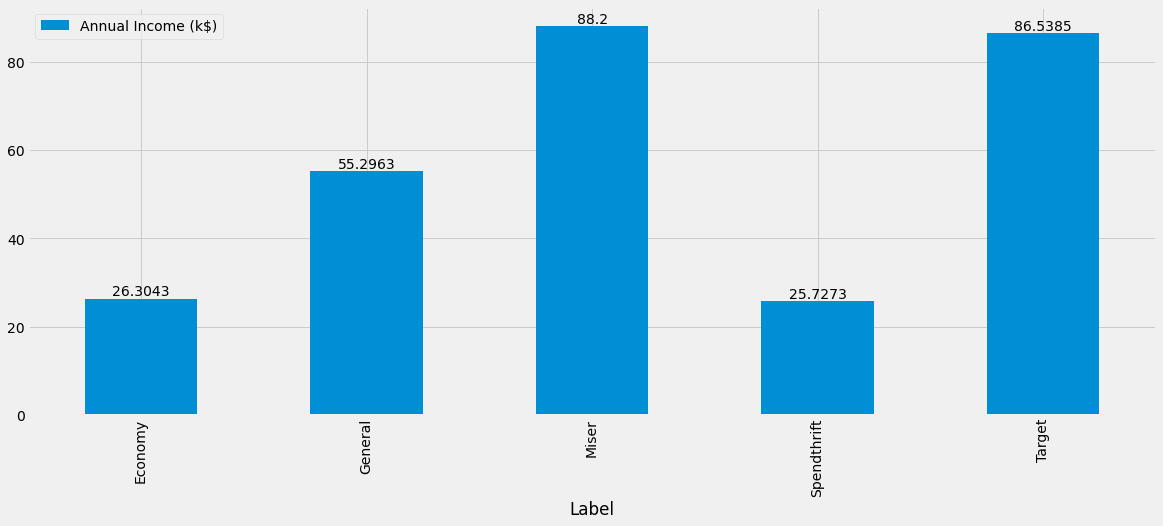

In [23]:
plotMeanValue(income_df_mean, 'Label', 'Annual Income (k$)')

<p align='center'>Bảng mức lương trung bình hàng năm của các nhóm.</p>